# Heart attack prediction


1. Age : age of patient
2. sex
3. exang : exercise induced angina (1=yes ,0=no)
4. ca : number of major vessels (0-3)
5. cp : chest pain type
   . 1 =tipical angina
   . 2 =atypical angina
   . 3= non anginal pain
   .4 =asymptomic
6. trbps : resting blood pressure
7. chol : cholestrol in mg/dl
8. fbs : fasting blood sugar (1= true, 0=false)
9. rest_ecg : resting electrocardiographic results
   0 -normal , 1 =having ST-T wave abnormality
   2- showing probale or definite ...
10. thalach : maximum heart rate achieved
11. target : 0= less chance of heart attack, 1 = more chance of heart attack
12. oldpeak : previous peak
13. thal : thal rate
14. output : target variable   
   


## imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV


## data loading

In [2]:
df =pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## data splitting

Random Seed: If you’re using any random processes (e.g., random sampling, model initialization), ensure that you set the same random seed for both training and testing to maintain consistency. This ensures that your results are reproducible.

In [3]:
# Set a fixed random seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(10)

In [4]:
hrt_train, hrt_test  = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
print(hrt_train.shape, hrt_test.shape)

(242, 14) (61, 14)


## basic EDA

In [6]:
hrt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 132 to 102
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 28.4 KB


In [ ]:
#hrt_test.isnull().sum()

In [7]:
hrt_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.681818,2.301653,0.549587
std,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.990620,0.593811,0.498566
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


looking at describe we can understand whether it is a categorical var<br>
min =0, max =1 ; cp : min:0, max:3 , restecg: min=0, max =2....... 

In [ ]:
#hrt_train.corr(method='pearson')

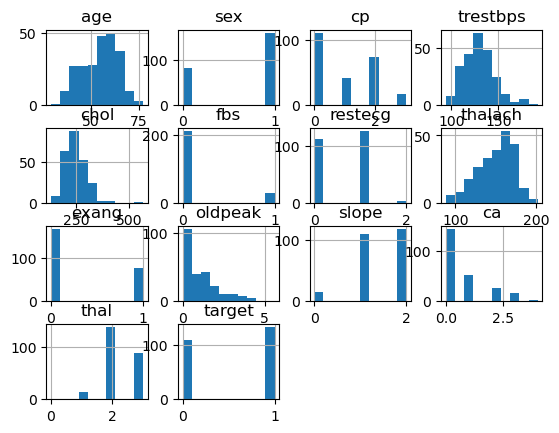

In [8]:
hrt_train.hist(); # by looking at it we can understand which one is a categorical variable 
# as it will not plot a continuous distribution of bins instead it will have 1,2.. individual bins

# data conversion for modelling

In [9]:
cat_vars =['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [ ]:
#hrt_train[cat_vars] = hrt_train[cat_vars].astype(object)

In [10]:
hrt_train.loc[:,cat_vars] = hrt_train.loc[:,cat_vars].astype(object)

In [11]:
hrt_test.loc[:,cat_vars] = hrt_test.loc[:,cat_vars].astype(object)

In [ ]:
#hrt_test[cat_vars] = hrt_test[cat_vars].astype(object)

## convert dummies

In [12]:
class get_dummies_cutoff(BaseEstimator, TransformerMixin):
    def __init__(self, freq_cutoff=0):
        self.freq_cutoff =freq_cutoff
        self.var_cat_dict ={}
        self.feature_names =[]

    def fit(self, x,y=None):  
        #Given a dataset x, the fit method computes the categories for each feature 
        #based on their frequency.
        data_cols = x.columns
        for col in data_cols:
            k =x[col].value_counts()
            if(k<= self.freq_cutoff).sum() ==0:
                cats =k.index[:-1]
            else:
                cats =k.index[k >self.freq_cutoff]
            self.var_cat_dict[col] =cats

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                self.feature_names.append(col+ '_' + str(cat))
        return self

    def transform(self,x,y=None):
        # The transform method creates dummy variables for each category in the dataset.
        dummy_data =x.copy()

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                name =col+ '_'+ str(cat)
                dummy_data[name] = (dummy_data[col] == cat).astype(int) # Compare with the actual category
                # (dummy_data[col] == str(cat)) --- error

            # The issue is that the condition (dummy_data[col] == str(cat)) is always evaluating to False, resulting in all zeros.
            #This happens because the original values in dummy_data[col] are not equal to the string representation of the category (str(cat)).
            del dummy_data[col] #removes the original categorical feature from the dataset
        return dummy_data

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names 

        # fit method
#If the frequency of a category is less than or equal to the freq_cutoff, 
#it includes all categories except the last one (since it’s not below the threshold)
# Otherwise, it includes only the categories with frequency greater than 
# the freq_cutoff
# The resulting categories are stored in var_cat_dict

In [13]:
dummy_threshold = np.round(0.10 * hrt_train.shape[0],0)

In [14]:
dummy_threshold

24.0

if not using pipeline and other required function need to fit individually and then concat rest of left over variables n turn them to dataframe

dummy_fit = get_dummies_cutoff(dummy_threshold)
dummy_fit.fit(hrt_train[cat_vars])
# have to fit only dummy_variables -- hrt_train[cat_vars]  otherwise model gets confuse 
# and it starts to convert some other columns into dummy

columns = dummy_fit.feature_names


X_train1 = pd.DataFrame(data =dummy_fit.transform(hrt_train[cat_vars]), columns=columns)
X_test1 = pd.DataFrame(data= dummy_fit.transform(hrt_test[cat_vars]), columns=columns)

X_train1.shape

X_train1.head()

In [ ]:
# (X_train['cp_0'] == 1).sum(), (X_train['cp_0']==0).sum()

In [ ]:
# (X_train['cp_1'] == 1).sum(), (X_train['cp_1']==0).sum()

X_train1.columns # only those columns which has been dummy encoded are present
# only those columns went through fit and transform

In [15]:
hrt_test.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,53.983607,136.639344,243.967213,147.786885,1.144262,0.524590
std,8.641936,19.457674,48.156677,25.089251,1.374230,0.503539
min,34.000000,102.000000,126.000000,71.000000,0.000000,0.000000
25%,46.000000,124.000000,208.000000,132.000000,0.000000,0.000000
50%,55.000000,135.000000,245.000000,148.000000,0.600000,1.000000
75%,60.000000,150.000000,273.000000,168.000000,1.900000,1.000000
max,71.000000,200.000000,409.000000,192.000000,6.200000,1.000000


In [16]:
num_vars =['age','trestbps','chol','thalach','oldpeak']

In [17]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(hrt_train[num_vars])
X_train2 = pd.DataFrame(data =stdsc.transform(hrt_train[num_vars]), columns=num_vars)
X_test2 = pd.DataFrame(data= stdsc.transform(hrt_test[num_vars]), columns=num_vars)

In [18]:
from mypipes import *


In [19]:

p1 =pdPipeline([
    ('cat_var', VarSelector(cat_vars)),
    ('impute', DataFrameImputer()),
    ('dummies',get_dummies_cutoff(dummy_threshold))
])

p2 = pdPipeline([
    ('num_select',VarSelector(num_vars)),
    ('impute',DataFrameImputer()),
    ('standardize', StandardScaler())
])

In [20]:
data_pipe = FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [21]:
dp_new = data_pipe.fit(hrt_train)
dp_new

FeatureUnion(transformer_list=[('cat_pipe',
                                pdPipeline(steps=[('cat_var',
                                                   VarSelector(feature_names=['sex',
                                                                              'cp',
                                                                              'fbs',
                                                                              'restecg',
                                                                              'exang',
                                                                              'slope',
                                                                              'ca',
                                                                              'thal'])),
                                                  ('impute',
                                                   DataFrameImputer()),
                                                  ('dummies',
                                                   get_dummies_cutoff(freq_cutoff=24.0))])),
                               ('num_pipe',
                                pdPipeline(steps=[('num_select',
                                                   VarSelector(feature_names=['age',
                                                                              'trestbps',
                                                                              'chol',
                                                                              'thalach',
                                                                              'oldpeak'])),
                                                  ('impute',
                                                   DataFrameImputer()),
                                                  ('standardize',
                                                   StandardScaler())]))])

In [22]:
X_train =pd.DataFrame(data =dp_new.transform(hrt_train), columns=data_pipe.get_feature_names_out())
X_train

,cat_pipe__sex_1,cat_pipe__cp_0,cat_pipe__cp_2,cat_pipe__cp_1,cat_pipe__fbs_0,cat_pipe__restecg_1,cat_pipe__restecg_0,cat_pipe__exang_0,cat_pipe__slope_2,cat_pipe__slope_1,cat_pipe__ca_0,cat_pipe__ca_1,cat_pipe__ca_2,cat_pipe__thal_2,cat_pipe__thal_3,num_pipe__age,num_pipe__trestbps,num_pipe__chol,num_pipe__thalach,num_pipe__oldpeak
0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.356798,-0.616856,0.914034,0.532781,-0.920864
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.385086,1.169491,0.439527,-1.753582,-0.193787
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.921327,1.169491,-0.300704,-0.139679,2.350982
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.058483,0.276318,0.059921,0.487950,0.351521
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.602822,-0.795490,-0.319684,0.443119,0.351521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.485856,0.574042,-0.262744,0.577611,-0.375556
238,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.376988,-2.165023,-0.376625,0.174136,-0.920864
239,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.582631,1.764940,-0.243763,-0.856969,-0.829979
240,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.921327,-0.616856,0.040941,-0.274171,-0.193787


In [23]:
X_test = pd.DataFrame(data=dp_new.transform(hrt_test),
                     columns= data_pipe.get_feature_names_out())

In [24]:
X_test.head()

,cat_pipe__sex_1,cat_pipe__cp_0,cat_pipe__cp_2,cat_pipe__cp_1,cat_pipe__fbs_0,cat_pipe__restecg_1,cat_pipe__restecg_0,cat_pipe__exang_0,cat_pipe__slope_2,cat_pipe__slope_1,cat_pipe__ca_0,cat_pipe__ca_1,cat_pipe__ca_2,cat_pipe__thal_2,cat_pipe__thal_3,num_pipe__age,num_pipe__trestbps,num_pipe__chol,num_pipe__thalach,num_pipe__oldpeak
0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.276218,1.169491,0.553408,-1.708752,-0.375556
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.493954,2.360389,0.781172,0.398289,-0.739095
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.276218,1.169491,-2.293633,1.025918,-0.739095
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.167350,0.216773,3.077785,-0.005187,0.805944
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.800367,-1.212304,0.344625,-0.901800,-0.920864


X_train = pd.concat([X_train1, X_train2], axis=1)
X_test = pd.concat([X_test1, X_test2], axis=1)

X_train = pd.concat([X_train, hrt_train[num_vars]], axis=1)
X_test = pd.concat([X_test, hrt_test[num_vars]], axis=1)

In [25]:
X_train.shape, X_test.shape

((242, 20), (61, 20))

In [26]:
y_train = hrt_train['target']
y_test = hrt_test['target']

In [27]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

# modelling

In [28]:
model_dict ={
    'logreg' : {'class_weight' : ['balanced',None],
               'penalty' : ['l1','l2'],
               'C' : [.0001, .0005,.001,.005,.01,.05,.1,1,2,5],
               #'solver': ['liblinear']
               },
                

    'dt' : {'class_weight' : [None, 'balanced'],
           'max_depth': [None,5,10,15,20,30,50,70],
           'min_samples_leaf' : [1,2,5,10,15,20],
           'min_samples_split' : [2,5,10,15,20]},

    'rf' : { 'n_estimators' : [100,200],
            'max_features' :[5,10,15,20,25,30,35],
            'bootstrap' : [True,False],
            'class_weight' :[None, 'balanced']},

    
    'extra_tree' : {
    'n_estimators': [100,200],
    'max_features' :[5,10,20,25,30,35],
    'bootstrap': [True, False],
    'class_weight':[None,'balanced'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf': [1,2,5,10,15,20],
    'min_samples_split': [2,5,10,15,20]},

    'gradient_boost' :{
    'n_estimators': [50,100,200],
    'learning_rate':[0.01,0.05,0.1,0.2,0.4,0.8,1],
    'max_depth': [1,2,3,4,5,6],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf': [2,5,10,20],
    'subsample': [0.5,0.8,1],
    'max_features': [3,5,7,10,14,22]},

    'xgboost': {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "max_depth": [2,3,4,5,6,7,8],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000],
             },
    
    'neural_network' :{
    'learning_rate': ["constant","invscaling","adaptive"],
    'hidden_layer_sizes':[(5,10,5),(20,10),(10,20)],
    'activation' :["relu", "logistic", "tanh"]
    }

}

In [29]:
def report(results, n_top=1):   # n_top= 1 than 'Model with rank' always 1 bcoz we r choosing rank 1 from each model 
    for i in range(1, n_top +1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean vlaidation score :{0:.5f} (std: {1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('Parameters :{0}'.format(results['params'][candidate]))
            print("")


def run_model(X_train_data, X_test_data, y_train_data,y_test_data,model,metric):
    best_f1_score = 0
    best_model_name = None
    for i in model.keys():
        if i == 'logreg':
            mod =LogisticRegression(random_state=42)
        if i =='dt':
            mod = DecisionTreeClassifier(random_state=42)
        if i == 'rf':
            mod = RandomForestClassifier(random_state=42)

        if i=='extra_tree':
            mod = ExtraTreesClassifier(random_state=42)
        if i=='gradient_boost':
            mod = GradientBoostingClassifier(random_state=42)
        if i=='xgboost':
            mod = XGBClassifier(objective='binary:logistic',random_state=42)

        if i =='neural_network':
            mod = MLPClassifier(random_state=42)


        random_search = RandomizedSearchCV(mod,scoring=metric, param_distributions=model_dict[i],
                                          cv=5, n_iter=5, n_jobs=-1,
                                          verbose=0)
        random_search.fit(X_train_data,y_train_data)
        final_mod =random_search.best_estimator_
        y_pred =final_mod.predict(X_test_data)

        f1 =np.round(f1_score(y_test_data,y_pred),4)
        p = np.round(precision_score(y_test_data,y_pred),4)
        r= np.round(recall_score(y_test_data, y_pred),4)

        print(f'Model-{i} | F1-{f1} | Precision-{p} | Recall-{r}')
        print(final_mod)
        report(random_search.cv_results_)
        print('################===============###############')

         # Update the best model if the current F1 score is higher
        if f1 > best_f1_score:
            best_f1_score = f1
            best_model_name = i

    print(f"Best model: {best_model_name} with F1 score: {best_f1_score}")



In [ ]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [30]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((242, 20), (242,), (61, 20), (61,))

In [64]:
from sklearn.metrics import roc_auc_score
run_model(X_train,X_test,y_train,y_test,model_dict,'roc_auc')

Model-logreg | F1-0.9032 | Precision-0.9333 | Recall-0.875
LogisticRegression(C=1, random_state=42)
Model with rank: 1
Mean vlaidation score :0.90801 (std: 0.03171)
Parameters :{'penalty': 'l2', 'class_weight': None, 'C': 1}

################===============###############
Model-dt | F1-0.8525 | Precision-0.8966 | Recall-0.8125
DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10, min_samples_split=5,
                       random_state=42)
Model with rank: 1
Mean vlaidation score :0.84070 (std: 0.02255)
Parameters :{'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 5, 'class_weight': 'balanced'}

################===============###############
Model-rf | F1-0.8571 | Precision-0.871 | Recall-0.8438
RandomForestClassifier(max_features=15, n_estimators=200, random_state=42)
Model with rank: 1
Mean vlaidation score :0.89595 (std: 0.01741)
Parameters :{'n_estimators': 200, 'max_features': 15, 'class_weight': None, 'bootstrap': Tru

# fit best model

In [54]:
logreg = LogisticRegression(**{'penalty': 'l2', 'class_weight': 'balanced', 'C': 5})

In [55]:
log = logreg.fit(X_train,y_train)
log

LogisticRegression(C=5, class_weight='balanced')

In [56]:
log.intercept_

array([1.55478683])

In [57]:
pd.DataFrame({'Features' :X_train.columns  ,'beta_values / coefficient': log.coef_[0]})
#list(zip(X_train.columns, log.coef_[0]))

,Features,beta_values / coefficient
0,cat_pipe__sex_1,-1.631351
1,cat_pipe__cp_0,-2.189993
2,cat_pipe__cp_2,-0.322220
3,cat_pipe__cp_1,-1.272362
4,cat_pipe__fbs_0,-0.505152
5,cat_pipe__restecg_1,0.357907
6,cat_pipe__restecg_0,-0.112175
7,cat_pipe__exang_0,0.951957
8,cat_pipe__slope_2,1.135555
9,cat_pipe__slope_1,-0.277664


In [58]:
train_score = log.predict_proba(X_train)[:,1]
train_score[:10]

array([0.93777223, 0.08080757, 0.43635292, 0.85575672, 0.03444012,
       0.64072323, 0.72011217, 0.81553162, 0.97030235, 0.9309449 ])

In [59]:
test_score = log.predict_proba(X_test)[:,1]
real = y_test

In [60]:
cutoffs = np.linspace(0.01,0.99,99)

In [61]:
# checking at which cutoff metrics are performing well, so trying all cutoff values

F1_all= []

# predict_proba(X_train) - train_score
for cutoff in cutoffs:
    predicted =(test_score > cutoff).astype(int) # p > cutoff (true) then set to 1 other 0 
    TP =((predicted==1) & (real==1)).sum()  # real = y_train
    TN =((predicted==0) & (real==0)).sum()
    FP =((predicted==1) & (real==0)).sum()
    FN =((predicted==0) & (real==1)).sum()

    P= TP+FN
    N =TN +FP

    Precision =TP/(TP+FP)
    Recall =TP/P
    F1 =(2*Precision *Recall)/ (Precision +Recall)
  
    F1_all.append(F1)
    

In [62]:
mycutoff =cutoffs[F1_all == max(F1_all)]
mycutoff

array([0.06, 0.07, 0.08, 0.09])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_score >0.45,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [42]:
 1       0.93      0.88      0.90        32

SyntaxError: invalid syntax (2336617140.py, line 1)

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """ plot the roc curve based on probability"""
    fpr, tpr,thresholds =roc_curve(true_y, y_prob)
    plt.plot(fpr,tpr)
    plt.xlabel('False +ve rate')
    plt.ylabel('True +ve rate')
    score = roc_auc_score(true_y, y_prob)
    print(f"ROC AUC:{score :.4f}")

In [ ]:
plot_roc_curve(y_test, test_score)

apart from setting random_state in traintestsplit the other way to ensure consistency in ur outp use a fixed shuffle : some scikit learn algorithm like KFold, StratifiedKFold have a shuffle parameter. set this to false to maintain a same order in each fold


To ensure consistent preprocessing steps across your training and testing data, follow these guidelines:

Pipeline Approach:
Use Scikit-Learn’s Pipeline to encapsulate your preprocessing steps. This ensures that the same transformations are applied to both training and testing data.
Include preprocessing steps (e.g., scaling, imputation, encoding) within the pipeline.
Fit on Training Data, Transform on Both:
Fit any preprocessing transformers (e.g., scalers, imputers) on the training data.
Then, apply the same transformations to both training and testing data using the fitted transformers.<br>
Avoid Data Leakage:
Never fit preprocessing steps (e.g., scalers, imputers) on the entire dataset (both training and testing combined).
Doing so can lead to data leakage and unrealistic performance estimates.
Remember to apply the same preprocessing steps consistently to both datasets, and your model will generalize better!